## Required Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from google.colab import drive
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
drive.mount('/content/drive')
%cd drive/MyDrive/Project/


Mounted at /content/drive
/content/drive/MyDrive/Project


## Loading the Dataset

In [ ]:
cali = pd.read_csv(r'Datasets/California_Housing_Dataset.csv')

In [ ]:
cali.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

## Data Exploration

In [ ]:
#finding Shape of the Dataset
cali.shape

(20640, 10)

In [ ]:
# Checking descriptionn of the Dataset
cali.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

In [ ]:
cali.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


<a id='data-preprocess'></a>
## Checking for missing values


In [ ]:
cali.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [ ]:
cali.dropna(inplace=True)

In [ ]:
cali.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [ ]:
cali.shape

(20433, 10)

Finding any duplicates

In [ ]:
print(cali.duplicated().any())

False


## finding relationship Betweent the Different Features and with the Label

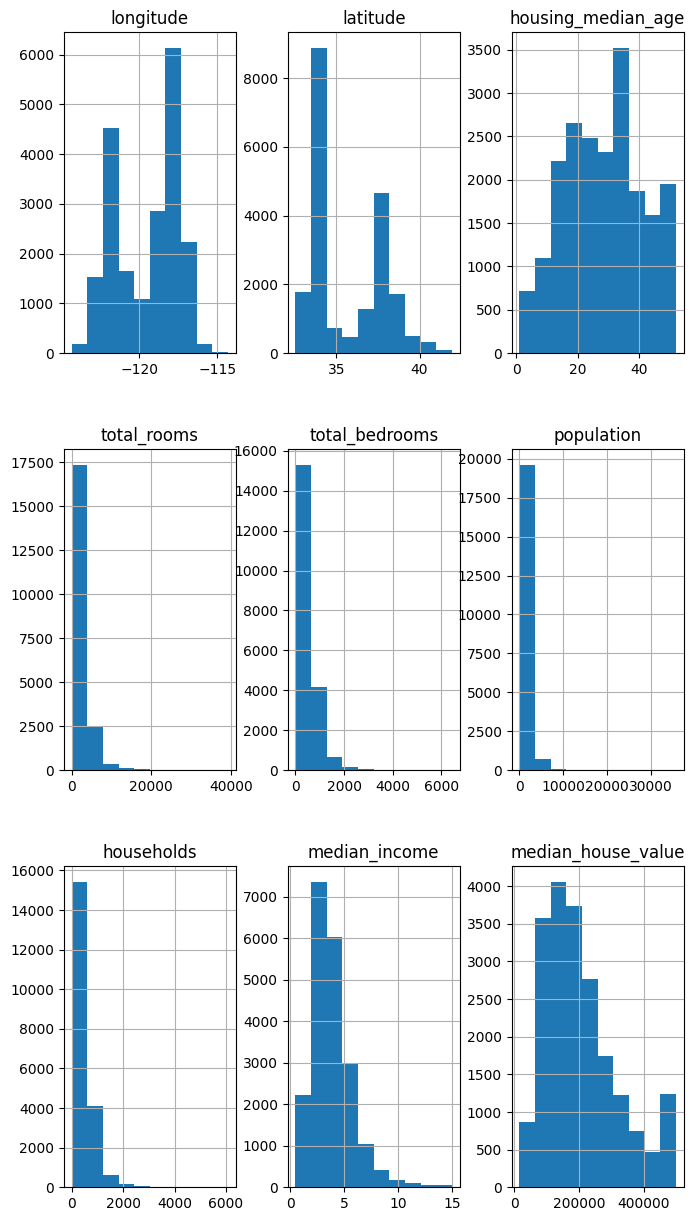

In [ ]:
cali.hist(figsize=(8,15));

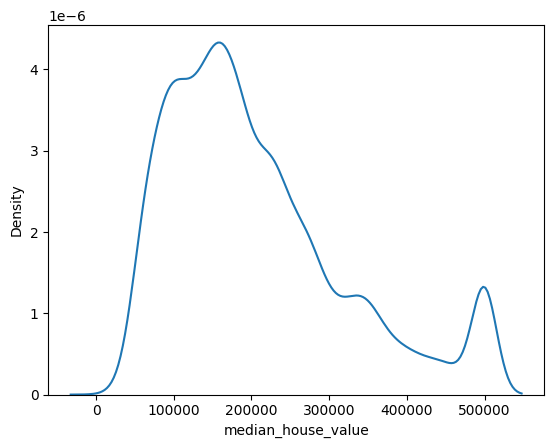

In [ ]:
sns.kdeplot(data=cali, x='median_house_value');

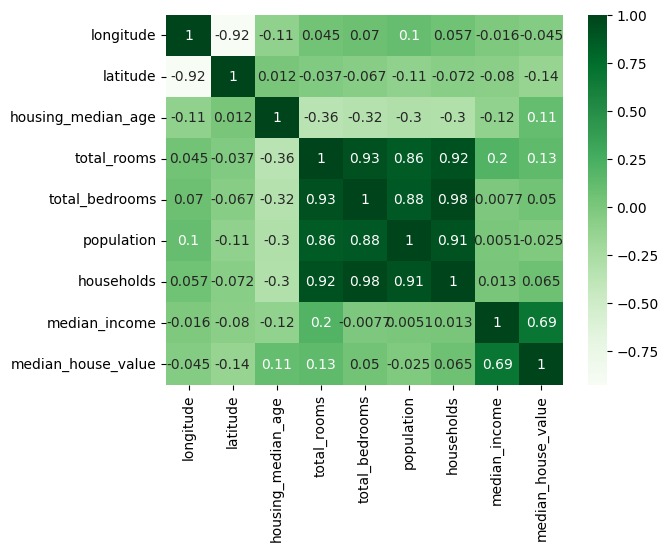

In [ ]:
sns.heatmap(cali.select_dtypes(['float','int']).corr(),annot=True,cmap ='Greens');

## Converting categorical variable to Dummy Variables

<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: ocean_proximity, dtype: int64


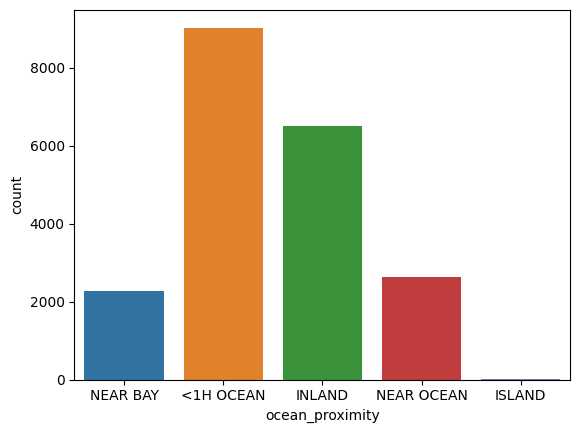

In [ ]:
print(cali['ocean_proximity'].value_counts())
sns.countplot(data=cali, x='ocean_proximity');


In [ ]:
cali=cali.join(pd.get_dummies(cali['ocean_proximity'])).drop('ocean_proximity',axis=1)

<ipython-input-33-b9f8a1fa6b5d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(cali.corr(),annot=True,cmap ='Greens');


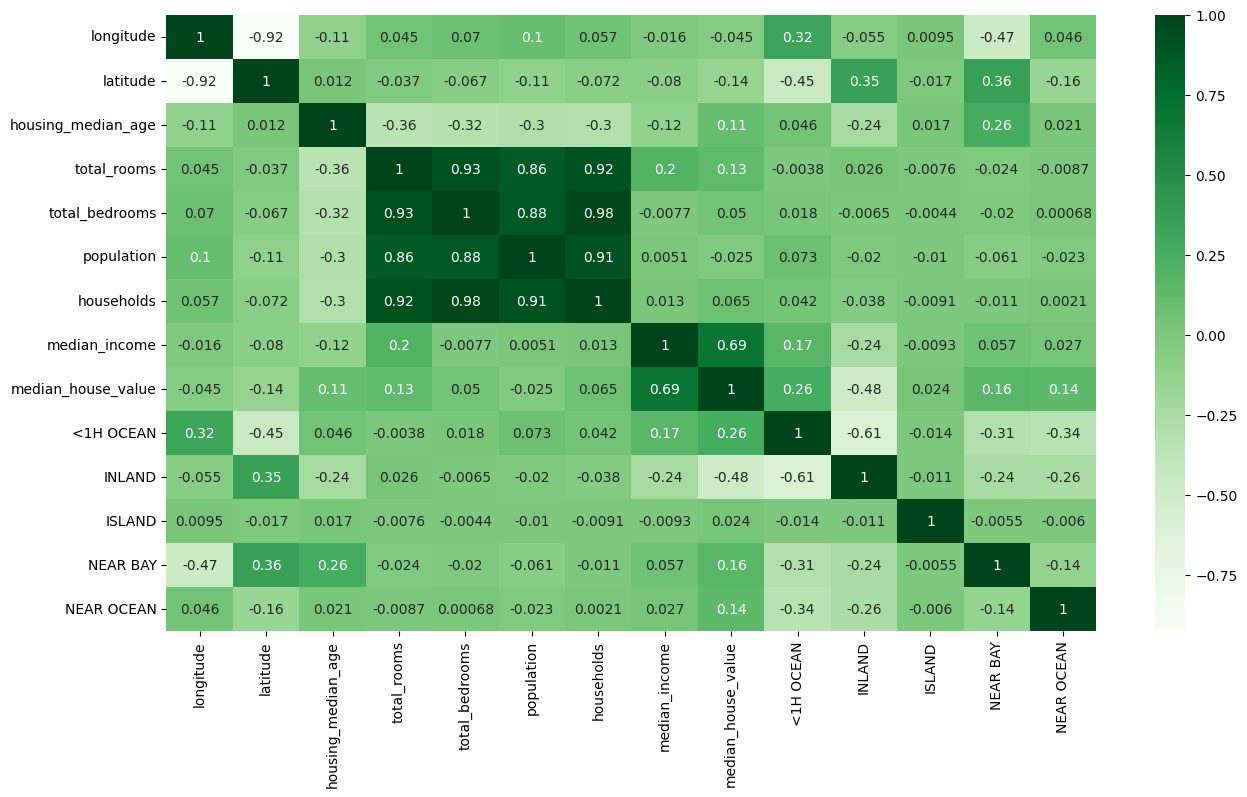

In [ ]:
plt.figure(figsize=(15,8 ))
sns.heatmap(cali.corr(),annot=True,cmap ='Greens');

In the above figure we are try to understand if which columns of ocean proximity are closely corelated to median house value

In [ ]:
import folium
map = folium.Map(location=[37.55978, -122.0145], zoom_start=10)
for long, lat, price in zip(cali['longitude'], cali['latitude'], cali['median_house_value']):
    folium.CircleMarker(
        location=[lat, long],
        radius=1,
        color='green' if price < 263900 else 'red'
    ).add_to(map)
map.add_child(folium.LatLngPopup())
map
#here we check to see which house prices are above and below 75% of house prices all above 75% of house price are marked in red we are taking only 2000 samples due to large volume of data

Output hidden; open in https://colab.research.google.com to view.

Text(0.5, 1.0, 'Distribution of households')

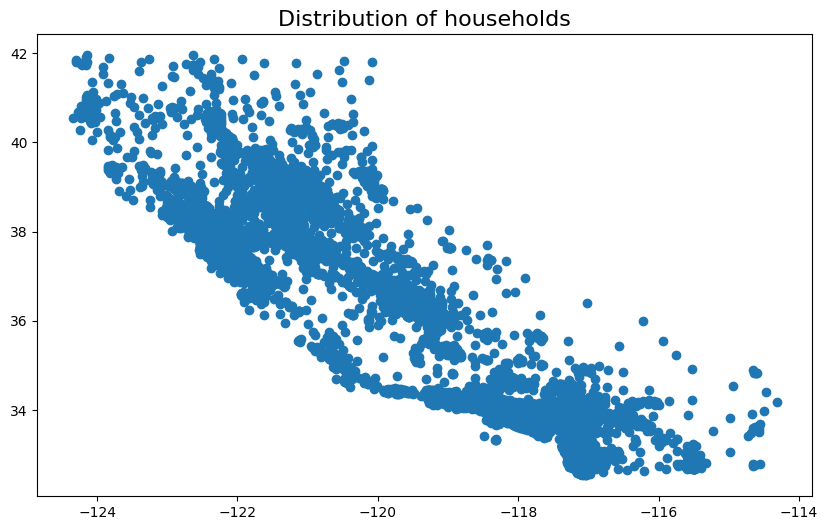

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(x=cali['longitude'],y=cali['latitude'])
plt.title("Distribution of households",size=16)

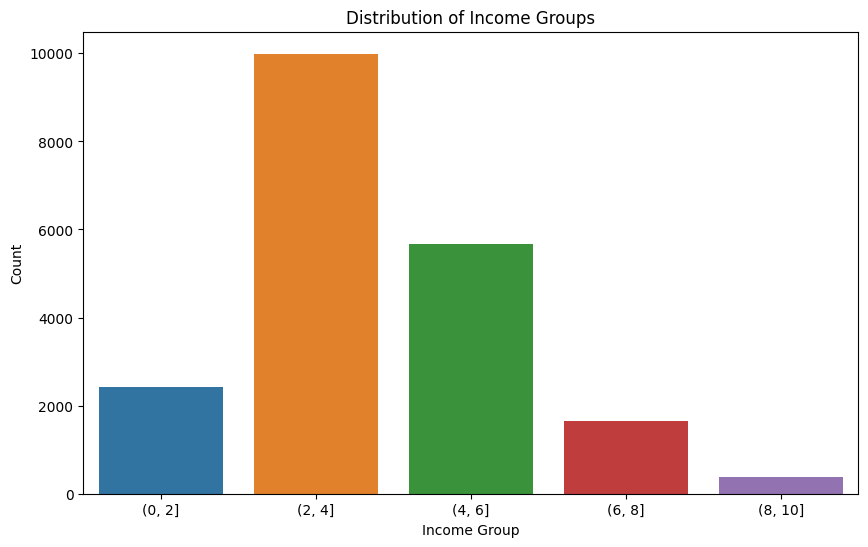

In [ ]:
cali['income_group'] = pd.cut(cali['median_income'], bins=[0, 2, 4, 6, 8, 10])
grouped = cali.groupby('income_group')['median_house_value'].mean().reset_index()
grouped['income_group'] = grouped['income_group'].apply(lambda x: x.mid)

# Create a countplot to visualize the distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=cali, x='income_group')
plt.xlabel('Income Group')
plt.ylabel('Count')
plt.title('Distribution of Income Groups')
plt.show()

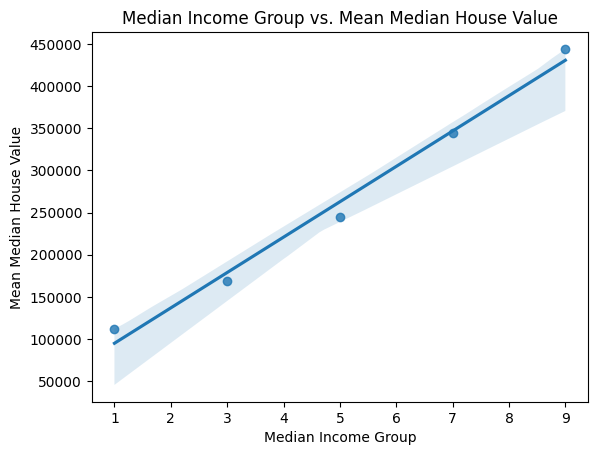

In [ ]:
sns.regplot(x='income_group', y='median_house_value', data=grouped)
plt.xlabel('Median Income Group')
plt.ylabel('Mean Median House Value')
plt.title('Median Income Group vs. Mean Median House Value')
plt.show()

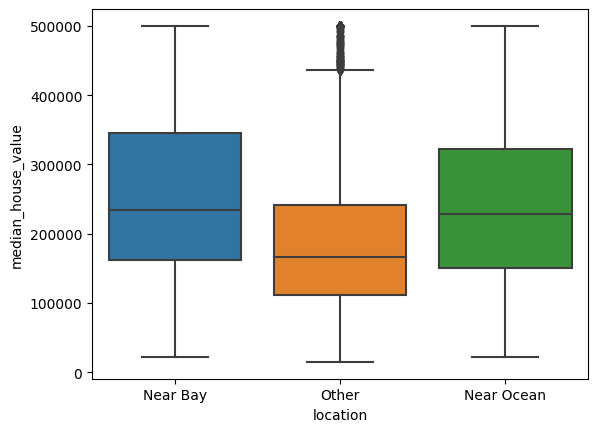

In [ ]:
cali['location'] = cali.apply(lambda row: 'Near Bay' if row['NEAR BAY'] == 1 else 'Near Ocean' if row['NEAR OCEAN'] == 1 else 'Other', axis=1)

# Create a box plot
sns.boxplot(x='location', y='median_house_value', data=cali);

In [ ]:
cali['median_income']

0        8.3252
1        8.3014
2        7.2574
3        5.6431
4        3.8462
          ...  
20635    1.5603
20636    2.5568
20637    1.7000
20638    1.8672
20639    2.3886
Name: median_income, Length: 20433, dtype: float64

In [ ]:
fig = px.scatter(cali, x='median_income', y='median_house_value', color='location',
                 title='Median Income vs. Median House Value with Location',
                 labels={'median_income': 'Median Income', 'median_house_value': 'Median House Value'},
                 color_discrete_sequence=['blue','orange' ,'green'])
fig.show()

In [ ]:
fig = px.scatter(cali, x='population', y='median_house_value', title='Population vs. House Price',color='location',
                 labels={'population': 'Population', 'median_house_value': 'House Price (in $100,000)'})
fig.show()

This figure shows the relationship between house price and population we can clearly see that lower than 5k population tend to have majority houses while as the population increases house prices tend to decrease house in the most populous area of 20-40k population has a house price around \$118000-\$134000 which are inland or \<1H ocean while those around 10-20k prices are around \$28000-\$450000 which are a much broader price range

Text(0.5, 1.0, 'KDE Plot Median Income vs Median House Value')

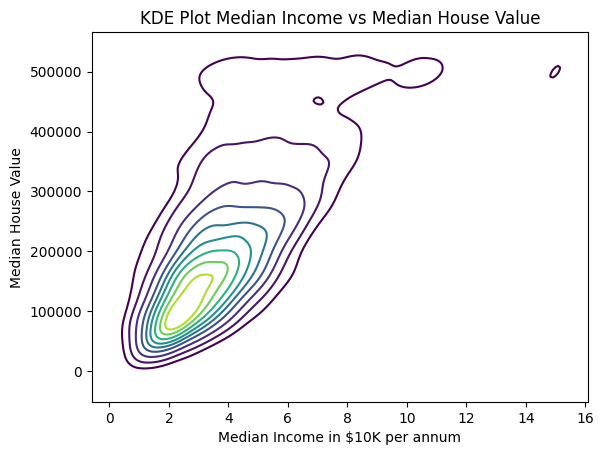

In [ ]:
sns.kdeplot(data=cali, x='median_income', y='median_house_value', cmap='viridis')
plt.xlabel('Median Income in $10K per annum')
plt.ylabel('Median House Value')
plt.title('KDE Plot Median Income vs Median House Value')

<ipython-input-51-38bb018f02b9>:4: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



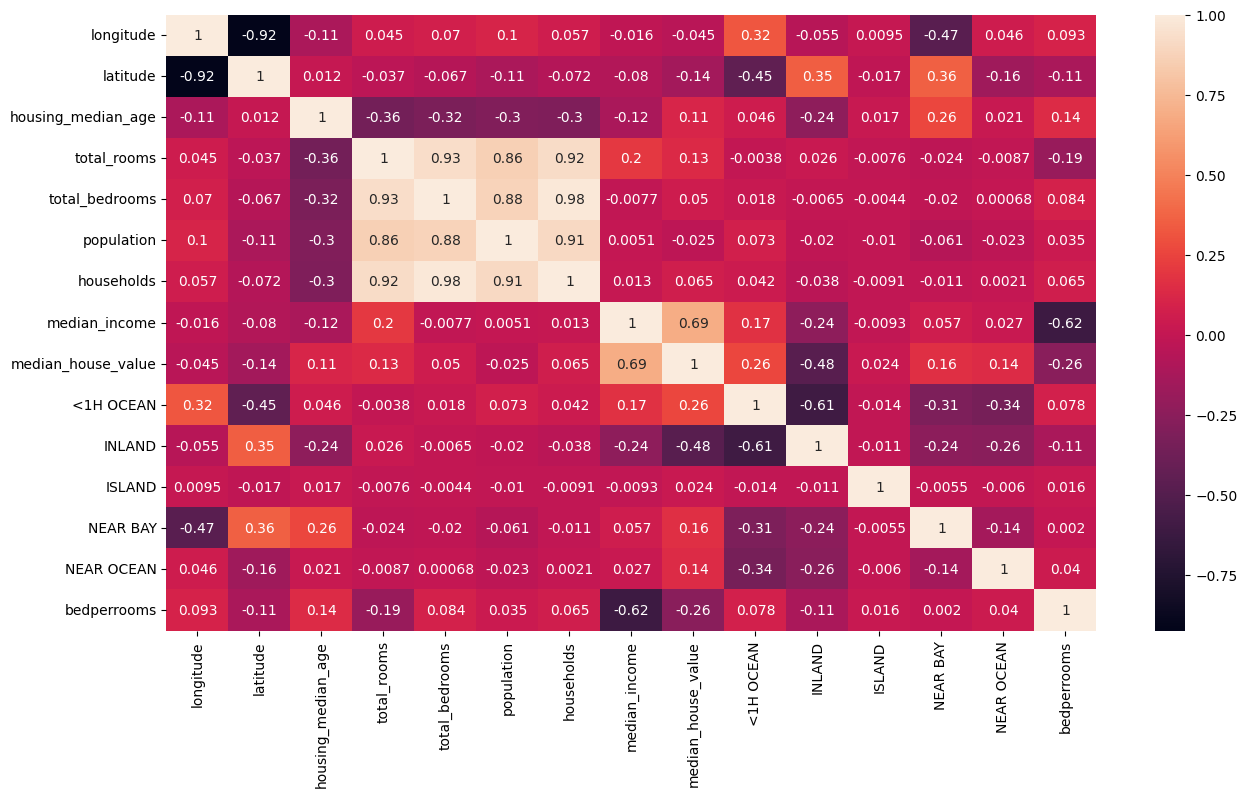

In [ ]:
cali['bedperrooms'] = cali['total_bedrooms'] / cali['total_rooms']
cali.drop('location',inplace=True,axis=1)
plt.figure(figsize=(15,8 ))
sns.heatmap(cali.corr(),annot=True);

## Splitting the dataframe into Features and Target columns and dropping highly and very lowly correlated features

In [ ]:
X_cali = cali.drop(['ISLAND','median_house_value','total_bedrooms','population','households','longitude','income_group'], axis = 1)
y_cali = cali['median_house_value']


<a id='train-test'></a>
## Splitting the Data into Training and Test Sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_cali,y_cali, random_state = 1501)

### Normalizing the Data

In [ ]:
n = len(X_cali.columns)
scaler = MinMaxScaler()
scaler.fit(X_train.iloc[:, :n])

MinMaxScaler()

In [ ]:
custom_scale = lambda X: np.hstack((scaler.transform(X.iloc[:, :n]), X.iloc[:, n:]))
X_train_scaled = custom_scale(X_train)
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)

In [ ]:
X_train_scaled_df

latitude  housing_median_age  total_rooms  median_income  <1H OCEAN  \
0      0.313830            0.352941     0.049005       0.193970        1.0   
1      0.541489            0.254902     0.048636       0.214087        0.0   
2      0.127660            0.254902     0.158824       0.169936        0.0   
3      0.176596            0.352941     0.067985       0.145929        1.0   
4      0.543617            0.686275     0.092079       0.183232        0.0   
...         ...                 ...          ...            ...        ...   
15319  0.554255            0.901961     0.029366       0.086213        0.0   
15320  0.181915            0.431373     0.094267       0.254472        0.0   
15321  0.157447            1.000000     0.039647       0.508310        1.0   
15322  0.171277            0.941176     0.036668       0.168908        1.0   
15323  0.126596            0.274510     0.018795       0.198942        1.0   

       INLAND  NEAR BAY  NEAR OCEAN  bedperrooms  
0         0.0       0.0         0.0     0.106215  
1         1.0       0.0         0.0     0.152981  
2         1.0       0.0         0.0     0.100529  
3         0.0       0.0         0.0     0.257824  
4         1.0       0.0         0.0     0.092672  
...       ...       ...         ...          ...  
15319     0.0       1.0         0.0     0.146754  
15320     0.0       0.0         1.0     0.122725  
15321     0.0       0.0         0.0     0.042349  
15322     0.0       0.0         0.0     0.120204  
15323     0.0       0.0         0.0     0.221445  

[15324 rows x 9 columns]

In [ ]:
X_test_scaled = custom_scale(X_test)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns = X_test.columns)

In [ ]:
X_train_scaled_df.shape

(15480, 9)

<a id='knn'></a>
## Applying K Nearest Neighbors

In [ ]:
from KNN import KNNRegressor

### Applying KNN and finding optimal values of these hyperparameters and the corresponding optimal score are then printed at the end
Note: A value of 1 corresponds to the Manhattan distance, while a value of 2 corresponds to the Euclidean distance default is 2
- This is a custom implementation of Gridsearch which take a lot of time to compute

In [ ]:
param_grid = {
    'n_neighbors': range(1, 6),
    'distance_type': [1, 2],
    'weighted': [True, False]
}

# Create a KNNRegressor object
knn_model = KNNRegressor()

# Create a GridSearchCV object
grid_search = GridSearchCV(knn_model, param_grid, cv=5)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train_scaled_df[:1000], y_train[:1000])

# Print the best hyperparameters and best score
print(f'Best hyperparameters: {grid_search.best_params_}')
print(f'Best score: {grid_search.best_score_}')

KNNRegressor(n_neighbors=3, distance_type = 2, weighted = False)
KNNRegressor(n_neighbors=3, distance_type = 2, weighted = False)
KNNRegressor(n_neighbors=3, distance_type = 2, weighted = False)
KNNRegressor(n_neighbors=3, distance_type = 2, weighted = False)
KNNRegressor(n_neighbors=3, distance_type = 2, weighted = False)
KNNRegressor(n_neighbors=3, distance_type = 2, weighted = False)
KNNRegressor(n_neighbors=3, distance_type = 2, weighted = False)
KNNRegressor(n_neighbors=3, distance_type = 2, weighted = False)
KNNRegressor(n_neighbors=3, distance_type = 2, weighted = False)
KNNRegressor(n_neighbors=3, distance_type = 2, weighted = False)
KNNRegressor(n_neighbors=3, distance_type = 2, weighted = False)
KNNRegressor(n_neighbors=3, distance_type = 2, weighted = False)
KNNRegressor(n_neighbors=3, distance_type = 2, weighted = False)
KNNRegressor(n_neighbors=3, distance_type = 2, weighted = False)
KNNRegressor(n_neighbors=3, distance_type = 2, weighted = False)
KNNRegressor(n_neighbors=

In [ ]:
knn_score = grid_search.best_score_
knn_score

0.5508642551703737

In [ ]:
train_score = []
test_score = []

neighbors = range(1, 8)
for n in neighbors:
    # Build the model
    knn = KNNRegressor(n_neighbors=n, distance_type = grid_search.best_params_['distance_type'], weighted = grid_search.best_params_['weighted'])
    knn.fit(X_train_scaled_df[:500], y_train[:500])
    # Getting Training Score
    train_score.append(knn.score(X_train_scaled_df[:1000], y_train[:500]))
    # Getting Test Score
    test_score.append(knn.score(X_test_scaled_df[:1000], y_test[:1000]))

KNNRegressor(n_neighbors=1, distance_type = 1, weighted = False)
KNNRegressor(n_neighbors=2, distance_type = 1, weighted = False)
KNNRegressor(n_neighbors=3, distance_type = 1, weighted = False)
KNNRegressor(n_neighbors=4, distance_type = 1, weighted = False)
KNNRegressor(n_neighbors=5, distance_type = 1, weighted = False)
KNNRegressor(n_neighbors=6, distance_type = 1, weighted = False)
KNNRegressor(n_neighbors=7, distance_type = 1, weighted = False)


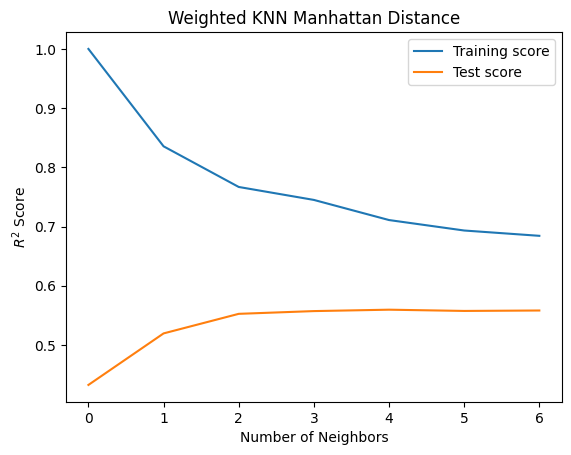

In [ ]:
    sns.lineplot(train_score, label='Training score')
    sns.lineplot(test_score, label='Test score')
    plt.xlabel('Number of Neighbors')
    plt.ylabel('$R^2$ Score')
    plt.legend()
    plt.title('Weighted KNN Manhattan Distance');

<a id='rfr'></a>
## Applying Random Forest Regression

In [ ]:
# Maximum number of features to consider at each node
p = int(np.ceil(X_train.shape[1]/3))
print(p)

3


In [ ]:
from RandomForest import RandomForestRegressor

In [ ]:
param_grid = {
    'min_samples_split': [2, 10, 100],
    'max_depth': [5, 15, 25],
    'n_estimators':[5,25,50]
}

best_score = 0.0
best_params = {}

for s in param_grid['min_samples_split']:
    for d in param_grid['max_depth']:
      for j in param_grid['n_estimators']:
        params = {'min_samples_split': s, 'max_depth': d}
        rf = RandomForestRegressor(n_estimators=5, max_features=p, **params)
        rf.fit(X_train_scaled_df[:1000], y_train[:1000])
        current_score = rf.score_r2(X_test_scaled_df, y_test)
        if current_score > best_score:
            best_score = current_score
            best_params = params
            best_params['n_estimators']=j
        print(f'For n_estimator {j} , sample split {s} and max depth {d} the current score is {current_score}')

print(f'Best hyperparameters: {best_params}')
print(f'Best Score: {best_score}')

For n_estimator 5 , sample split 2 and max depth 5 the current score is 0.6077960790312465
For n_estimator 25 , sample split 2 and max depth 5 the current score is 0.596571759330687
For n_estimator 50 , sample split 2 and max depth 5 the current score is 0.6121410445039465
For n_estimator 5 , sample split 2 and max depth 15 the current score is 0.5913820660196822
For n_estimator 25 , sample split 2 and max depth 15 the current score is 0.596398769908209
For n_estimator 50 , sample split 2 and max depth 15 the current score is 0.5958102117569466
For n_estimator 5 , sample split 2 and max depth 25 the current score is 0.5990934106810353
For n_estimator 25 , sample split 2 and max depth 25 the current score is 0.5979999333934054
For n_estimator 50 , sample split 2 and max depth 25 the current score is 0.6065890091492854
For n_estimator 5 , sample split 10 and max depth 5 the current score is 0.614382939382358
For n_estimator 25 , sample split 10 and max depth 5 the current score is 0.6085

In [ ]:
random_forest_score=best_score

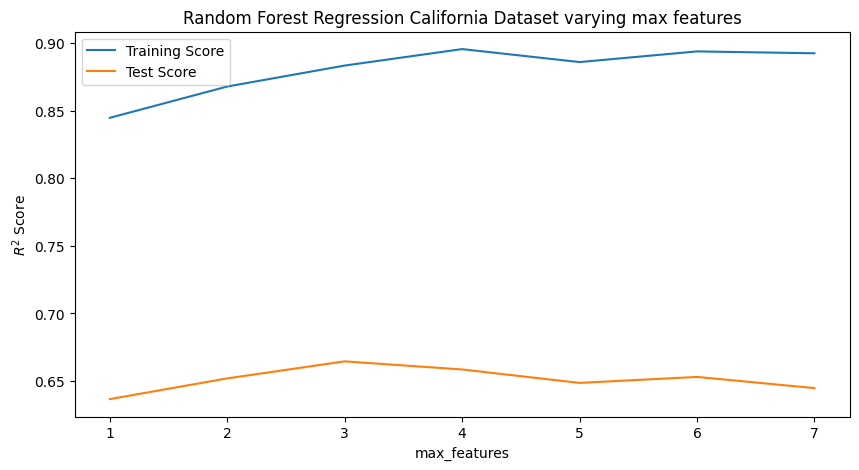

In [ ]:
p = [i for i in range(1,int(np.ceil(X_train_scaled.shape[1]/3)+5))]

train_score = []
test_score = []
for n in p:
    rf = RandomForestRegressor(n_estimators = best_params['n_estimators'],
                               min_samples_split = best_params['min_samples_split'],
                               max_depth = best_params['max_depth'],
                               max_features = n)
    rf.fit(X_train_scaled_df.to_numpy()[:1000], y_train.to_numpy()[:1000])
    train_score.append(rf.score_r2(X_train_scaled_df.to_numpy()[:1000], y_train[:1000]))
    test_score.append(rf.score_r2(X_test_scaled_df, y_test))

fig, ax = plt.subplots(figsize=(10,5))
sns.lineplot(x=p, y=train_score, label='Training Score', ax=ax)
sns.lineplot(x=p, y=test_score, label='Test Score', ax=ax)
ax.set(xlabel = 'max_features',
       ylabel = '$R^2$ Score',
       xticks =p,
       title = 'Random Forest Regression California Dataset varying max features')
ax.legend();

In [ ]:
p = int(np.ceil(X_train_scaled.shape[1]/3)+2)
train_score = []
test_score = []
num_trees = [1,2,5, 10,25,50,100]
for n in num_trees:
    rf = RandomForestRegressor(n_estimators = n,
                               min_samples_split = best_params['min_samples_split'],
                               max_depth = best_params['max_depth'],
                               max_features = p)
    rf.fit(X_train_scaled_df.to_numpy()[:1000], y_train.to_numpy()[:1000])
    train_score.append(rf.score_r2(X_train_scaled_df.to_numpy()[:1000], y_train[:1000]))
    test_score.append(rf.score_r2(X_test_scaled_df, y_test))

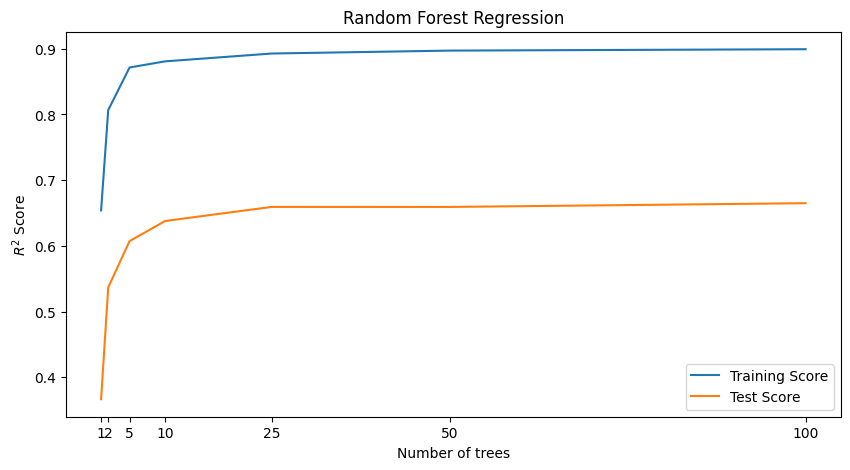

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
sns.lineplot(x=num_trees, y=train_score, label='Training Score', ax=ax)
sns.lineplot(x=num_trees, y=test_score, label='Test Score', ax=ax)
ax.set(xlabel = 'Number of trees',
       ylabel = '$R^2$ Score',
       xticks =num_trees,
       title = 'Random Forest Regression')
ax.legend();

In [ ]:
train_score = []
test_score = []
samples = [1,2,5,7,10, 50]
for s in samples:
    rf = RandomForestRegressor(n_estimators = best_params['n_estimators'],
                               min_samples_split = s,
                               max_depth = best_params['max_depth'],
                               max_features = p)
    rf.fit(X_train_scaled[:1000], y_train.to_numpy()[:1000])
    train_score.append(rf.score_r2(X_train_scaled, y_train))
    test_score.append(rf.score_r2(X_test_scaled, y_test))

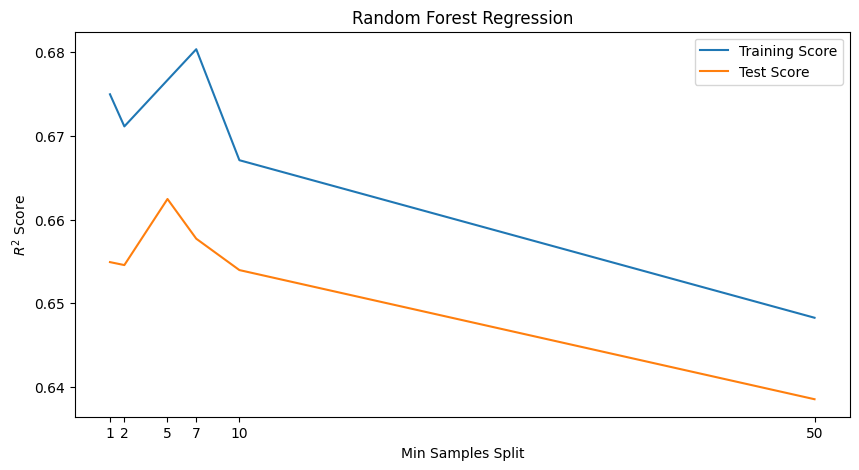

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
sns.lineplot(x=samples, y=train_score, label='Training Score', ax=ax)
sns.lineplot(x=samples, y=test_score, label='Test Score', ax=ax)
ax.set(xlabel = 'Min Samples Split',
       ylabel = '$R^2$ Score',
       xticks =samples,
       title = 'Random Forest Regression')
ax.legend();

In [ ]:
train_score = []
test_score = []
depth = [2, 5, 8, 12,25]
for d in depth:
    rf = RandomForestRegressor(n_estimators = 50,
                               min_samples_split = best_params['min_samples_split'],
                               max_depth = d,
                               max_features = p)
    rf.fit(X_train_scaled[:1000], y_train.to_numpy()[:1000])
    train_score.append(rf.score_r2(X_train_scaled, y_train))
    test_score.append(rf.score_r2(X_test_scaled, y_test))

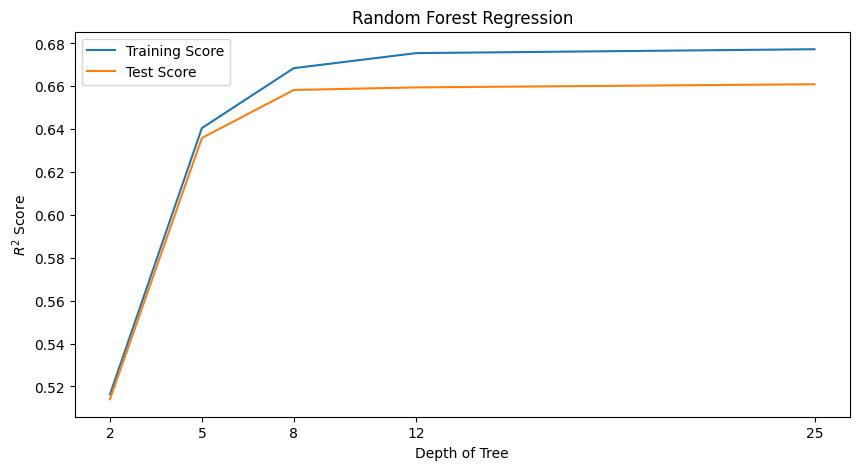

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
sns.lineplot(x=depth, y=train_score, label='Training Score', ax=ax)
sns.lineplot(x=depth, y=test_score, label='Test Score', ax=ax)
ax.set(xlabel = 'Depth of Tree',
       ylabel = '$R^2$ Score',
       xticks = depth,
       title = 'Random Forest Regression')
ax.legend();

### Implementing Multilayer perceptron (NN)

In [ ]:
from MLP import MLP

In [ ]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing() # Due to some custom preprocessing done above reloading the data california data for mlp
X = housing.data
y = housing.target

# Split the data into training and test sets
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X, y, random_state=1501)

# Scale the data
scaler = MinMaxScaler()
X_train_m = scaler.fit_transform(X_train_m)
X_test_m = scaler.transform(X_test_m)

# Define the architecture of the MLP
n_inputs = X_train_m.shape[1]
n_hidden1 = 30
n_hidden2 = 30
n_outputs = 1

# Create an instance of the MLP class
mlp = MLP(n_inputs, n_hidden1, n_hidden2, n_outputs)

# Train the MLP on the training set
mlp.fit(X_train_m,y_train_m)

# Evaluate the trained MLP on the test set
y_pred_test = mlp.predict(X_test_m)

# Compute and print the test MSE of the trained MLP
test_mse = mlp.mse_loss(np.array(y_test_m), y_pred_test)
print(f'Test MSE: {test_mse:.4f}')

test_r2 = r2_score(y_test_m, y_pred_test)
print(f'Test R-squared score: {test_r2:.4f}')

epochs = 0 ============> loss 25.86210110876499 
epochs = 50 ============> loss 1.272377600828592 
epochs = 100 ============> loss 1.1955212656463 
epochs = 150 ============> loss 1.1298566142870186 
epochs = 200 ============> loss 1.0715964828203108 
epochs = 250 ============> loss 1.0188582033719555 
epochs = 300 ============> loss 0.9706885793339505 
epochs = 350 ============> loss 0.9265853580122617 
epochs = 400 ============> loss 0.886255690300091 
epochs = 450 ============> loss 0.8494975544504928 
epochs = 500 ============> loss 0.8161449779362843 
epochs = 550 ============> loss 0.7860435620152243 
epochs = 600 ============> loss 0.7590384952246667 
epochs = 650 ============> loss 0.7349672870658188 
epochs = 700 ============> loss 0.7136549535614164 
epochs = 750 ============> loss 0.6949116016853675 
epochs = 800 ============> loss 0.6785327259639323 
epochs = 850 ============> loss 0.6643021486203324 
epochs = 900 ============> loss 0.6519970345150258 
epochs = 950 ========

In [ ]:
param_grid = { 'n_hidden1': [10, 15], 'n_hidden2': [10, 15],
              'learning_rate': [0.01, 0.1], 'n_epochs': [ 200,600] }
best_score = float('-inf')
best_params = {}

for h1 in param_grid['n_hidden1']:
    for h2 in param_grid['n_hidden2']:
        for lr in param_grid['learning_rate']:
            for ne in param_grid['n_epochs']:
                print('Currently in epoch ',h1,h2,lr,ne)
                mlp = MLP(n_inputs, h1, h2, n_outputs,activation='relu')
                mlp.fit(X_train_m, y_train_m, learning_rate=lr, n_epochs=ne)
                y_pred_test = mlp.predict(X_test_m)
                if all(np.array(y_test_m)!=np.NaN) and all(np.array(y_pred_test)!=np.NaN):
                  current_score = r2_score(np.array(y_test_m), y_pred_test)
                else:
                  current_score=0
                if current_score > best_score:
                    best_score = current_score
                    best_params = {'n_hidden1': h1, 'n_hidden2': h2, 'learning_rate': lr, 'n_epochs': ne}
                print(f'For n_hidden1={h1}, n_hidden2={h2}, learning_rate={lr}, n_epochs={ne}, the current score is {current_score:.4f}')

print(f'Best hyperparameters: {best_params}')
print(f'Best Score: {best_score:.4f}')

Currently in epoch  10 10 0.01 200
epochs = 0 ============> loss 6.898131653891081 
epochs = 50 ============> loss 0.841164941949342 
epochs = 100 ============> loss 0.740560422683106 
epochs = 150 ============> loss 0.6886610202745996 
For n_hidden1=10, n_hidden2=10, learning_rate=0.01, n_epochs=200, the current score is 0.4975
Currently in epoch  10 10 0.01 600
epochs = 0 ============> loss 6.898131653891081 
epochs = 50 ============> loss 0.841164941949342 
epochs = 100 ============> loss 0.740560422683106 
epochs = 150 ============> loss 0.6886610202745996 
epochs = 200 ============> loss 0.6563655833074733 
epochs = 250 ============> loss 0.6340386508949709 
epochs = 300 ============> loss 0.6173608494402856 
epochs = 350 ============> loss 0.6046341515002294 
epochs = 400 ============> loss 0.5946461269627578 
epochs = 450 ============> loss 0.586576406844747 
epochs = 500 ============> loss 0.5800101131012725 
epochs = 550 ============> loss 0.5745838168904132 
For n_hidden1=10,

In [ ]:
mlp_score=best_score

In [ ]:
train_losses = []
test_mses = []
n_epochs = 5000
learning_rate=best_params['learning_rate']
# Train the MLP for a fixed number of epochs
for epoch in range(1,n_epochs+1):
    # Forward pass: compute the predictions of the MLP on the training set
    y_pred, z1, a1, z2, a2 = mlp.forward_pass(X_train_m)

    # Compute the training loss
    loss = mlp.mse_loss(y_train_m, y_pred)
    train_losses.append(loss)

    # Backward pass: compute the gradients and update the weights and biases of the MLP
    d_z3, d_weights1, d_biases1, d_weights2, d_biases2, d_weights3, d_biases3 = mlp.backward_pass(X_train_m, y_train_m, y_pred, z1, a1, z2, a2)
    mlp.update_weights_biases(learning_rate, d_weights1, d_biases1, d_weights2, d_biases2, d_weights3, d_biases3)

    # Evaluate the trained MLP on the test set
    y_pred_test = mlp.predict(X_test_m)

    test_mse = mlp.mse_loss(y_test_m, y_pred_test)
    test_mses.append(test_mse)

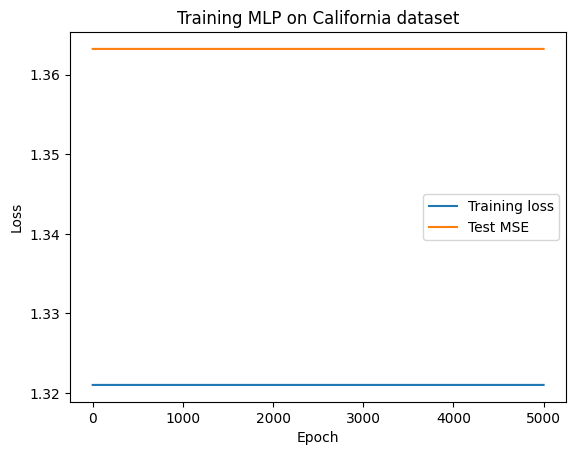

In [ ]:
plt.plot(train_losses, label='Training loss');
plt.plot(test_mses, label='Test MSE');
plt.xlabel('Epoch');
plt.ylabel('Loss');
plt.title('Training MLP on California dataset')
plt.legend();

Implementing Kernel Ridge regression

In [ ]:
from KernelizedRidge import KernelizedRidgeRegression

In [ ]:
param_grid = {
    'kernel': ['linear', 'polynomial', 'rbf'],
    'alpha': [0.01, 0.1, 1,5],
    'degree': [2, 3, 4]
}

best_score = 0.0
best_params = {}
score_saver = {}

for k in param_grid['kernel']:
    score_saver[k] = {}
    for a in param_grid['alpha']:
        score_saver[k][a] = {}
        for d in param_grid['degree']:
            rr = KernelizedRidgeRegression(alpha=a, kernel=k, degree=d)
            rr.fit(X_train_scaled_df[:2500], y_train[:2500].to_numpy())
            current_score = rr.score(X_test_scaled_df[:1000], y_test[:1000])
            score_saver[k][a][d] = current_score
            if current_score > best_score:
                best_score = current_score
                best_params = {'alpha': a, 'kernel': k, 'degree': d}
            print(f'For kernel={k}, alpha={a}, and degree={d}, the current score is {current_score:.4f}')

print(f'Best hyperparameters: {best_params}')
print(f'Best Score: {best_score:.4f}')
krr_model_score= best_score

For kernel=linear, alpha=0.01, and degree=2, the current score is 0.6076
For kernel=linear, alpha=0.01, and degree=3, the current score is 0.6076
For kernel=linear, alpha=0.01, and degree=4, the current score is 0.6076
For kernel=linear, alpha=0.1, and degree=2, the current score is 0.6080
For kernel=linear, alpha=0.1, and degree=3, the current score is 0.6080
For kernel=linear, alpha=0.1, and degree=4, the current score is 0.6080
For kernel=linear, alpha=1, and degree=2, the current score is 0.6096
For kernel=linear, alpha=1, and degree=3, the current score is 0.6096
For kernel=linear, alpha=1, and degree=4, the current score is 0.6096
For kernel=linear, alpha=5, and degree=2, the current score is 0.6037
For kernel=linear, alpha=5, and degree=3, the current score is 0.6037
For kernel=linear, alpha=5, and degree=4, the current score is 0.6037
For kernel=polynomial, alpha=0.01, and degree=2, the current score is 0.6381
For kernel=polynomial, alpha=0.01, and degree=3, the current score i

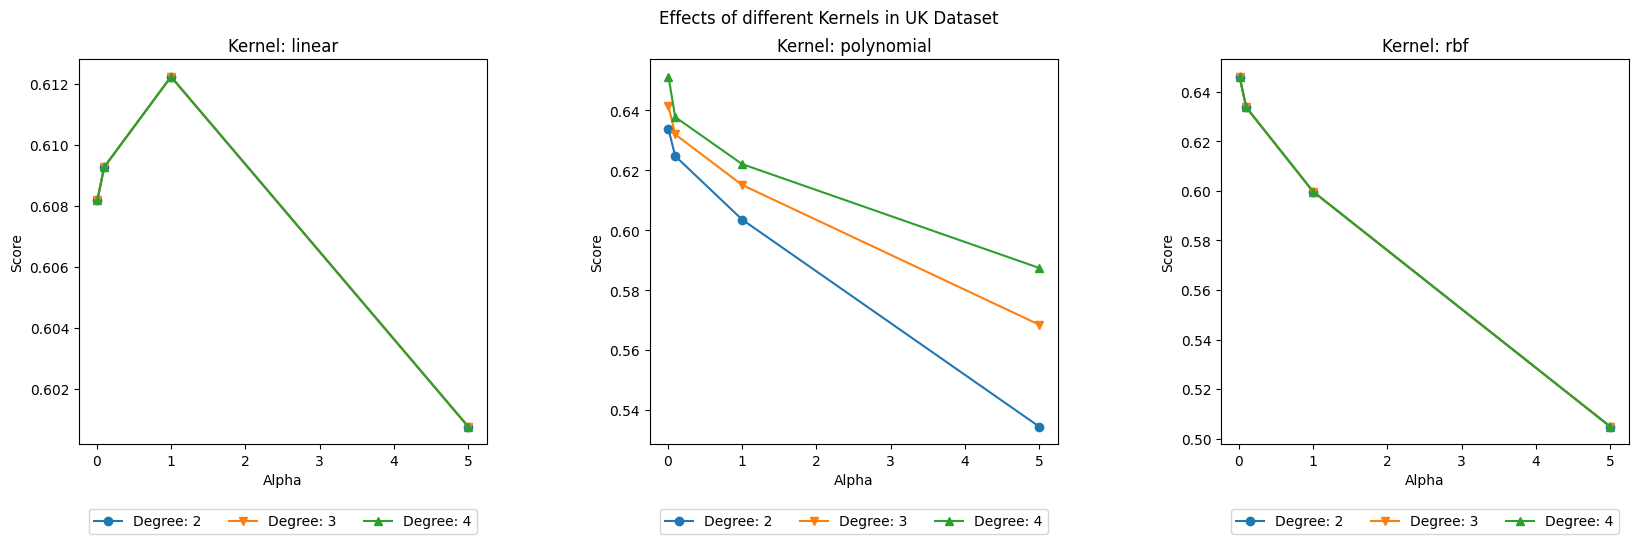

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(20, 5))
fig.subplots_adjust(wspace=0.4)

markers = ['o', 'v', '^', '<', '>', 's', 'p', '*']
for i, k in enumerate(param_grid['kernel']):
    ax = axs[i]
    for j, d in enumerate(param_grid['degree']):
        scores = [score_saver[k][a][d] for a in param_grid['alpha']]
        ax.plot(param_grid['alpha'], scores, label=f'Degree: {d}', marker=markers[j])
    ax.set_xlabel('Alpha')
    ax.set_ylabel('Score')
    ax.set_title(f'Kernel: {k}')
    # Change the location of the legend
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)
plt.suptitle('Effects of different Kernels in UK Dataset')
plt.show()


In [ ]:
temp = []
for k in param_grid['kernel']:
    for d in param_grid['degree']:
        for a in param_grid['alpha']:
            score = score_saver[k][a][d]
            temp.append({'Kernel': k, 'Degree': d, 'Alpha': a, 'Score': score})
df = pd.DataFrame(temp).pivot_table(index=['Kernel', 'Degree'], columns='Alpha', values='Score')
df

Alpha                  0.01      0.10      1.00      5.00
Kernel     Degree                                        
linear     2       0.607603  0.607996  0.609568  0.603694
           3       0.607603  0.607996  0.609568  0.603694
           4       0.607603  0.607996  0.609568  0.603694
polynomial 2       0.638054  0.624937  0.607523  0.565495
           3       0.650808  0.635373  0.615125  0.586208
           4       0.663888  0.643528  0.621700  0.597032
rbf        2       0.653798  0.636988  0.610889  0.548818
           3       0.653798  0.636988  0.610889  0.548818
           4       0.653798  0.636988  0.610889  0.548818

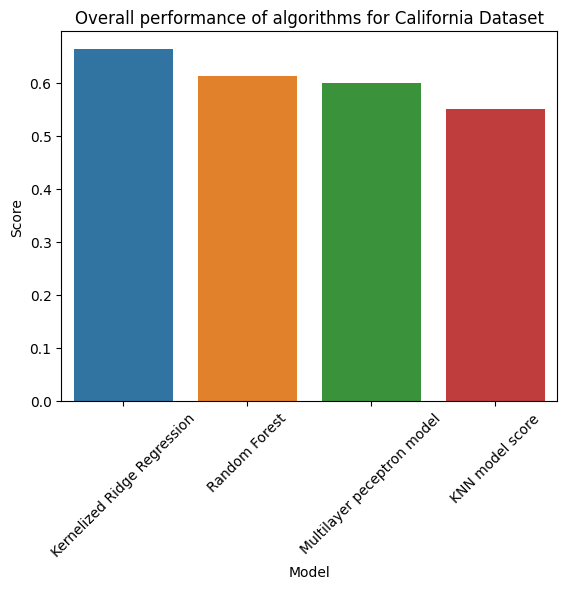

In [ ]:
final_comparisions = {'Kernelized Ridge Regression': krr_model_score, 'Multilayer peceptron model': mlp_score, 'Random Forest': random_forest_score, 'KNN model score': knn_score}

d = []
for model, score in final_comparisions.items():
    d.append({'Model': model, 'Score': score})

# Sort the data by Score in descending order
d = sorted(d, key=lambda x: x['Score'], reverse=True)

df = pd.DataFrame(d)

sns.barplot(data=df, x='Model', y='Score')
plt.xticks(rotation=45)
plt.title('Overall performance of algorithms for California Dataset')
plt.show()


In [ ]:
df

Model     Score
0  Kernelized Ridge Regression  0.663888
1                Random Forest  0.613626
2   Multilayer peceptron model  0.600000
3              KNN model score  0.550864

Building a pipeline with best algorithm

In [ ]:
pipe = Pipeline([
    ('scaler', MinMaxScaler()),
    ('regressor', KernelizedRidgeRegression(alpha=0.001, kernel= 'polynomial', degree= 4))
])

In [ ]:
pipe.fit(X_train.to_numpy(), np.array(y_train))

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('regressor',
                 <KernelizedRidge.KernelizedRidgeRegression object at 0x7b65450bbac0>)])

In [ ]:
y_pred = pipe.predict(X_test.to_numpy())

In [ ]:
print('R^2 score: ',r2_score(y_test, y_pred))

$R^2$ score:  0.6763441141845559


In [ ]:
class InductiveConformalRegressor:
    def __init__(self, model):
        self.model = model

    def fit(self, X_train, y_train, X_cal, y_cal):
        # Fit underlying model to proper training set
        self.model.fit(X_train, y_train)

        # Calculate nonconformity scores for calibration set
        y_pred_cal = self.model.predict(X_cal)
        self.nc_scores_ = np.abs(y_pred_cal - y_cal)

    def predict(self, X, significance=0.05):
        # Make predictions using underlying model
        y_pred = self.model.predict(X)

        # Calculate prediction intervals
        n = len(self.nc_scores_)
        k = int(np.ceil(significance * n))
        threshold = np.partition(self.nc_scores_, -k)[-k]
        interval = np.abs(y_pred - threshold)
        lower = y_pred - interval
        upper = y_pred + interval


        return lower, upper


In [ ]:
X_train, X_cal, y_train, y_cal = train_test_split(X_train, y_train, test_size=0.25, random_state=0)

In [ ]:
icp = InductiveConformalRegressor(pipe)
icp.fit(X_train.to_numpy(), np.array(y_train), X_cal.to_numpy(), np.array(y_cal))

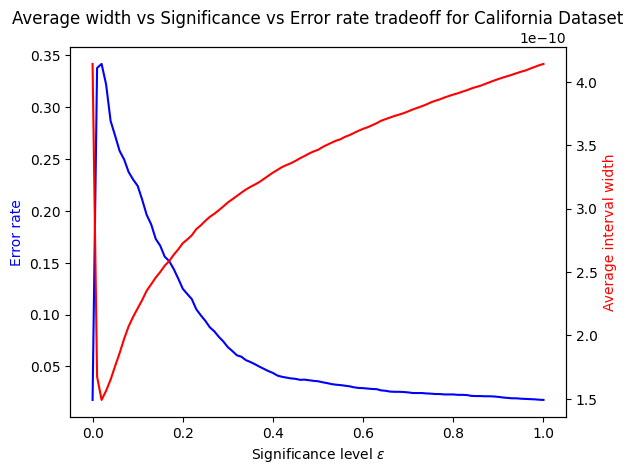

In [ ]:
significance_levels = np.linspace(0, 1, 101)
error_rate = []
avg_width = []
for significance in significance_levels:
    lower, upper = icp.predict(X_test.to_numpy(), significance=significance)

    in_interval = np.logical_and(lower <= y_test, y_test <= upper)
    error_rate.append(1 - np.mean(in_interval))
    width = upper - lower
    avg_width.append(np.mean(width))

fig, ax1 = plt.subplots()
ax1.plot(significance_levels, error_rate, label='Error rate', color='b')
ax1.set_xlabel('Significance level $\epsilon$')
ax1.set_ylabel('Error rate', color='b')
ax2 = ax1.twinx()
ax2.plot(significance_levels, avg_width, label='Average interval width', color='r')
ax2.set_ylabel('Average interval width', color='r')
plt.title('Average width vs Significance vs Error rate tradeoff for California Dataset')
plt.show()
